In [1]:
# Import necessary libraries for MNIST
from keras.datasets import mnist
from skimage.feature import hog
from skimage import data, exposure
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

11490434/11490434 [==============================] - 0s 0us/step
Train data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


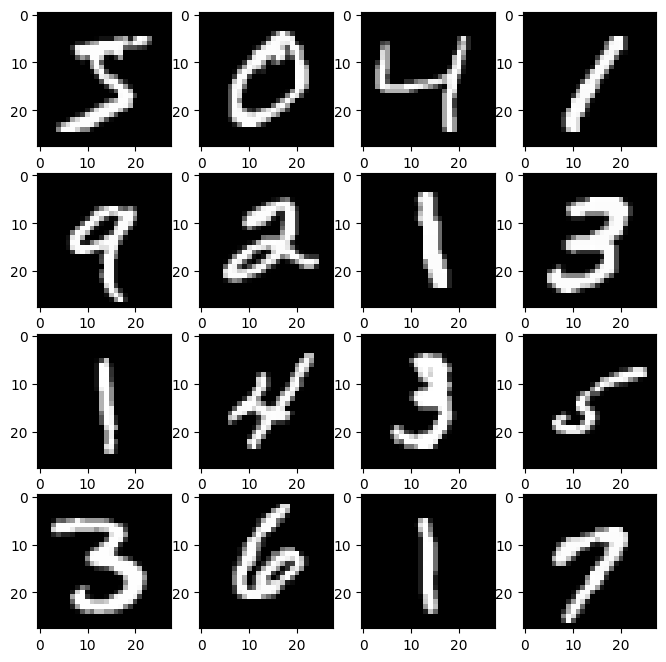

In [2]:
# Load the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Print the shapes of each dataset split
print(f"Train data shape: {train_X.shape}")
print(f"Test data shape: {test_X.shape}")

# Plotting
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
plt.show()

In [3]:
# Apply HOG features to the images
def extract_hog_features(images):
    features = []
    for image in images:
      fd = hog(image, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(2, 2), block_norm='L2-Hys')
      features.append(fd)
    return np.array(features)


train_X_hog = extract_hog_features(train_X)
test_X_hog = extract_hog_features(test_X)
# Plotting
train_X_hog.shape

(60000, 1152)

In [4]:
# Implement a KNN with 'K' as a parameter and Euclidean distance
k_values = [3, 5, 7, 10]  # Example list of k values to try
best_k = k_values[0]
best_accuracy = 0

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    accuracy = cross_validate(knn_classifier, train_X_hog, train_y, cv=5)['test_score'].mean()
    print(f"Validation accuracy with KNN (k={k}): {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

# Train the KNN classifier with the best k on the whole training set
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(train_X_hog, train_y)

# Evaluate the KNN classifier on the test set
test_y_pred_knn = knn_classifier.predict(test_X_hog)
test_accuracy_knn = accuracy_score(test_y, test_y_pred_knn)
print(f"Test accuracy with KNN: {test_accuracy_knn}")

Validation accuracy with KNN (k=3): 0.9715
Validation accuracy with KNN (k=5): 0.9722166666666666
Validation accuracy with KNN (k=7): 0.9718166666666667
Validation accuracy with KNN (k=10): 0.9714833333333333
Test accuracy with KNN: 0.9749


In [5]:
# Implement two other models of your choice
# Model 1: Support Vector Machine (SVM)
kernels = ['linear', 'poly', 'rbf', 'sigmoid']  # Example list of kernels to try
best_kernel = 0
best_accuracy = 0
for i in range(len(kernels)):
  svm_classifier = SVC(kernel=kernels[i])
  accuracy = cross_validate(svm_classifier, train_X_hog, train_y, cv=5)['test_score'].mean()
  print(f"Validation accuracy with svm (kernel = {kernels[i]}): {accuracy}")
  if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_kernel = i

svm_classifier = SVC(kernel=kernels[best_kernel])
svm_classifier.fit(train_X_hog, train_y)
test_y_pred_svm = svm_classifier.predict(test_X_hog)
test_accuracy_svm = accuracy_score(test_y, test_y_pred_svm)
print(f"Test accuracy with SVM: {test_accuracy_svm}")

Validation accuracy with svm (kernel = linear): 0.97705
Validation accuracy with svm (kernel = poly): 0.9882500000000001
Validation accuracy with svm (kernel = rbf): 0.98705
Validation accuracy with svm (kernel = sigmoid): 0.9525666666666666
Test accuracy with SVM: 0.9902


In [6]:
# Model 2: Random Forest
rf = RandomForestClassifier()
rf.fit(train_X_hog, train_y)
test_y_pred_rf = rf.predict(test_X_hog)
test_accuracy_rf = accuracy_score(test_y, test_y_pred_rf)
print(f"Test accuracy with Random Forest: {test_accuracy_rf}")

Test accuracy with Random Forest: 0.9754


Axes(0.125,0.53;0.281818x0.35)
Axes(0.547727,0.53;0.281818x0.35)
Axes(0.125,0.11;0.281818x0.35)


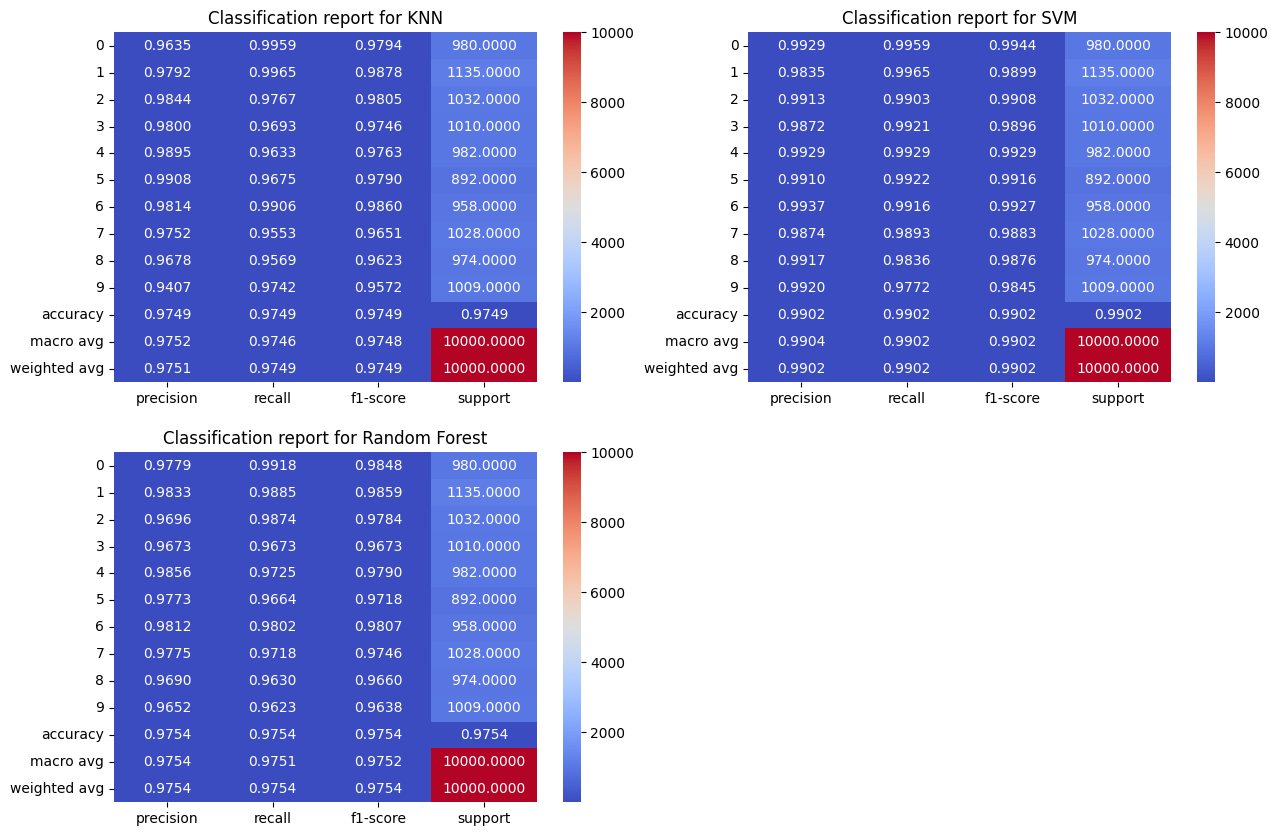

In [11]:
# Select proper metrics for the final comparison of the results
# The classification_report function already provides precision, recall, and F1-score for each class

plt.figure(figsize=(15, 10))
# Print classification reports for each classifier
plt.subplot(221)
plt.title("Classification report for KNN")
report_KNN = classification_report(test_y, test_y_pred_knn, output_dict=True)
print(sns.heatmap(pd.DataFrame(report_KNN).transpose(), fmt='.4f', annot=True, cmap='coolwarm'))

plt.subplot(222)
plt.title("Classification report for SVM")
report_SVM = classification_report(test_y, test_y_pred_svm, output_dict=True)
print(sns.heatmap(pd.DataFrame(report_SVM).transpose(), fmt='.4f', annot=True, cmap='coolwarm'))

plt.subplot(223)
plt.title("Classification report for Random Forest")
report_RF = classification_report(test_y, test_y_pred_rf, output_dict=True)
print(sns.heatmap(pd.DataFrame(report_RF).transpose(), fmt='.4f', annot=True, cmap='coolwarm'))

Axes(0.125,0.53;0.281818x0.35)
Axes(0.547727,0.53;0.281818x0.35)
Axes(0.125,0.11;0.281818x0.35)


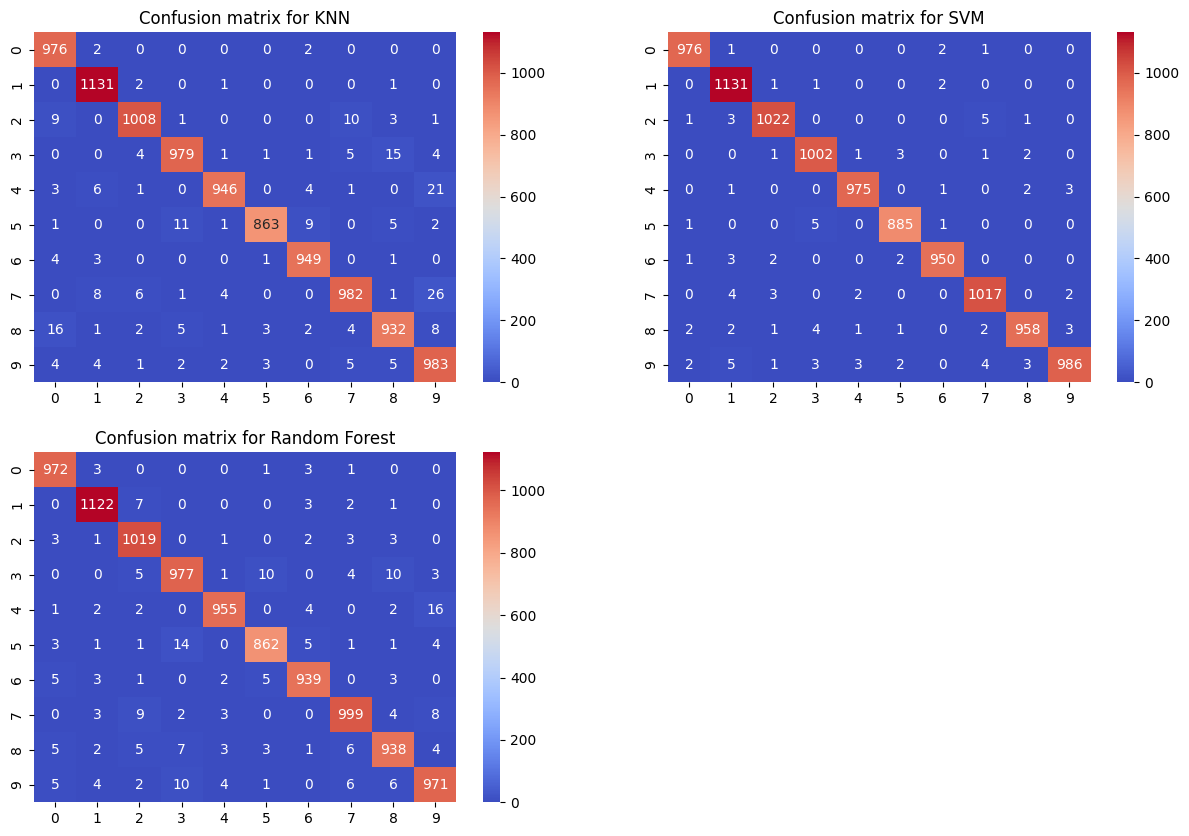

In [34]:
plt.figure(figsize=(15, 10))
# Print classification reports for each classifier
plt.subplot(221)
plt.title("Confusion matrix for KNN")
print(sns.heatmap(confusion_matrix(test_y, test_y_pred_knn), annot=True, fmt='d', cmap='coolwarm'))

plt.subplot(222)
plt.title("Confusion matrix for SVM")
print(sns.heatmap(confusion_matrix(test_y, test_y_pred_svm), annot=True, fmt='d', cmap='coolwarm'))

plt.subplot(223)
plt.title("Confusion matrix for Random Forest")
print(sns.heatmap(confusion_matrix(test_y, test_y_pred_rf), annot=True, fmt='d', cmap='coolwarm'))

([<matplotlib.patches.Wedge at 0x7e59e6b2e470>,
 [Text(0.555351552993044, 0.9495181159873751, 'KNN'),
  Text(-1.09999984302656, 0.000587657675491714, 'SVM'),
  Text(0.5548441197155906, -0.9498147202570781, 'Random Forest')],
 [Text(0.3029190289052967, 0.51791897235675, '33.1542%'),
  Text(-0.5999999143781236, 0.0003205405502682076, '33.6745%'),
  Text(0.30264224711759485, -0.5180807565038608, '33.1712%')])

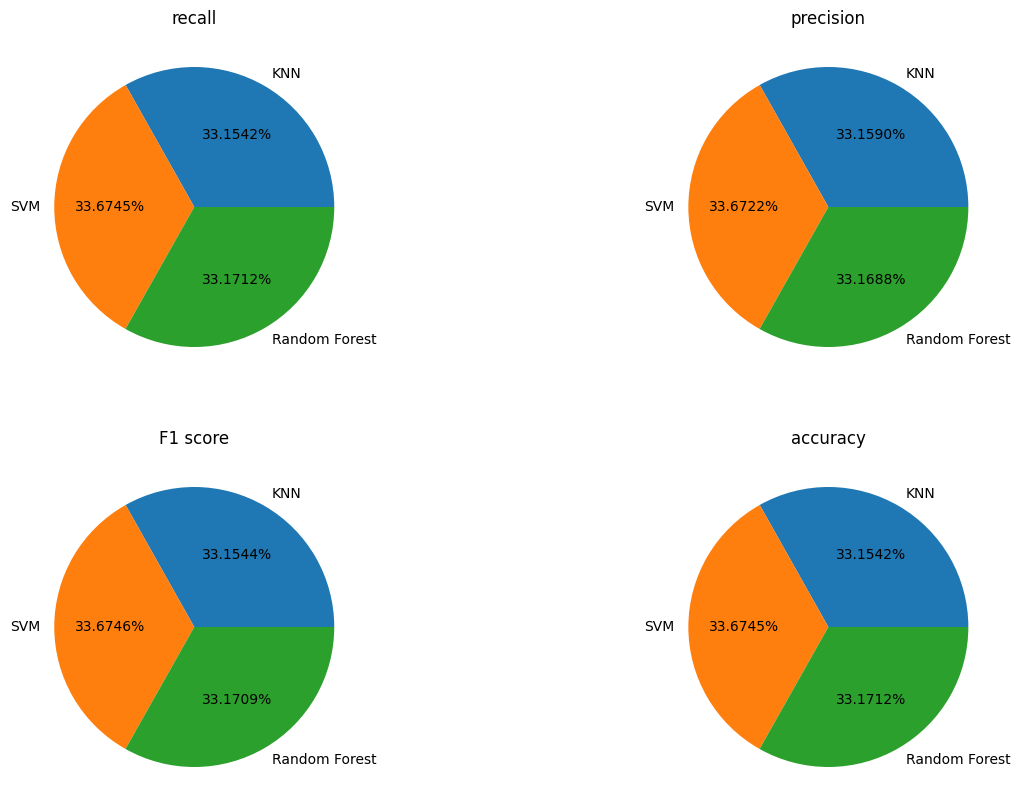

In [35]:
plt.figure(figsize=(15, 10))

recall_KNN = report_KNN['weighted avg']['recall']
recall_SVM = report_SVM['weighted avg']['recall']
recall_RF = report_RF['weighted avg']['recall']

plt.subplot(221)
plt.title('recall')
plt.pie(np.array([recall_KNN, recall_SVM, recall_RF]), labels=['KNN', 'SVM', 'Random Forest'], autopct='%.4f%%')

precision_KNN = report_KNN['weighted avg']['precision']
precision_SVM = report_SVM['weighted avg']['precision']
precision_RF = report_RF['weighted avg']['precision']

plt.subplot(222)
plt.title('precision')
plt.pie(np.array([precision_KNN, precision_SVM, precision_RF]), labels=['KNN', 'SVM', 'Random Forest'], autopct='%.4f%%')

f1_score_KNN = report_KNN['weighted avg']['f1-score']
f1_score_SVM = report_SVM['weighted avg']['f1-score']
f1_score_RF = report_RF['weighted avg']['f1-score']

plt.subplot(223)
plt.title('F1 score')
plt.pie(np.array([f1_score_KNN, f1_score_SVM, f1_score_RF]), labels=['KNN', 'SVM', 'Random Forest'], autopct='%.4f%%')

plt.subplot(224)
plt.title('accuracy')
plt.pie(np.array([test_accuracy_knn, test_accuracy_svm, test_accuracy_rf]), labels=['KNN', 'SVM', 'Random Forest'], autopct='%.4f%%')

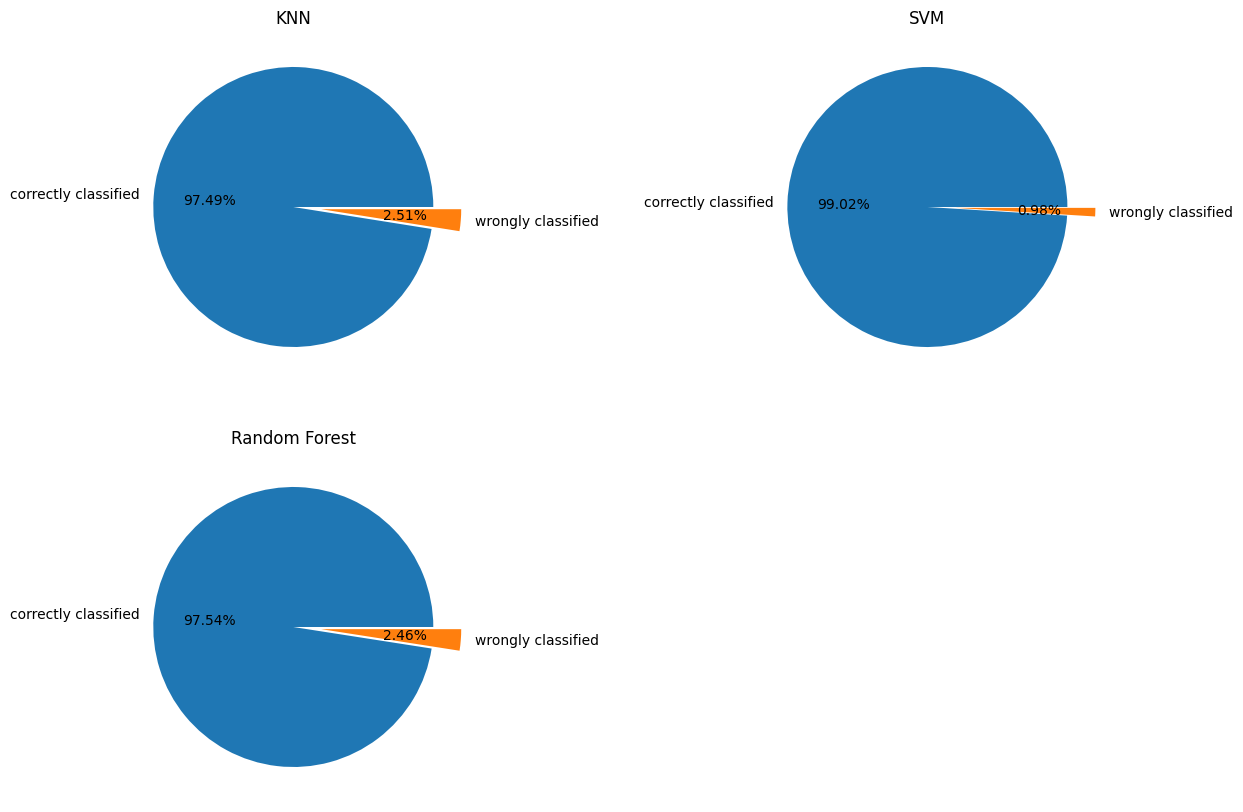

In [36]:
# Perform error analysis
# You can find the correctly and wrongly classified examples by comparing the predicted labels with the true labels
plt.figure(figsize = (15, 10))

plt.subplot(221)
plt.title('KNN')
correct_knn = len(np.nonzero(test_y_pred_knn == test_y)[0])
incorrect_knn = len(np.nonzero(test_y_pred_knn != test_y)[0])
plt.pie(np.array([correct_knn, incorrect_knn]), labels=['correctly classified', 'wrongly classified'] , explode=[0, .2] ,autopct='%.2f%%')

plt.subplot(222)
plt.title('SVM')
correct_svm = len(np.nonzero(test_y_pred_svm == test_y)[0])
incorrect_svm = len(np.nonzero(test_y_pred_svm != test_y)[0])
plt.pie(np.array([correct_svm, incorrect_svm]), labels=['correctly classified', 'wrongly classified'] , explode=[0, .2] ,autopct='%.2f%%')

plt.subplot(223)
plt.title('Random Forest')
correct_rf = len(np.nonzero(test_y_pred_rf == test_y)[0])
incorrect_rf = len(np.nonzero(test_y_pred_rf != test_y)[0])
plt.pie(np.array([correct_rf, incorrect_rf]), labels=['correctly classified', 'wrongly classified'], explode=[0, .2] , autopct='%.2f%%')

plt.show()

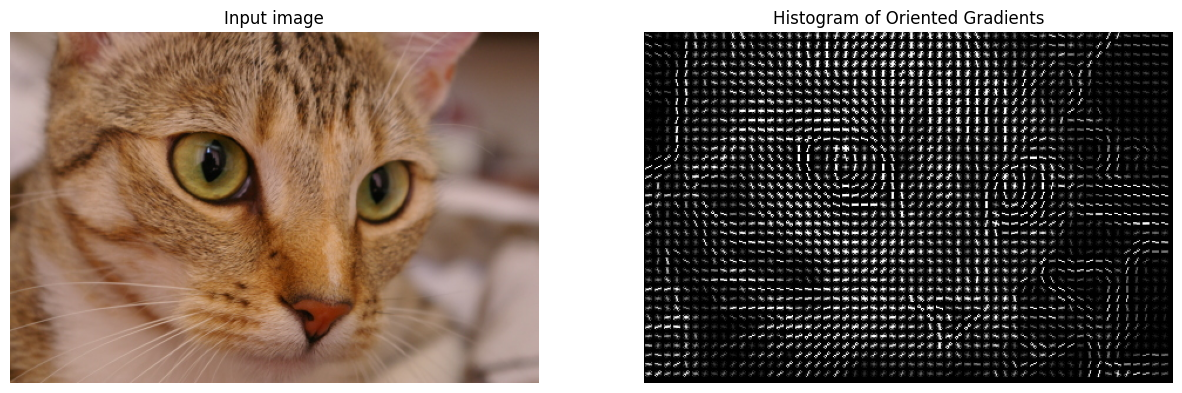

In [37]:
image = data.cat()
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

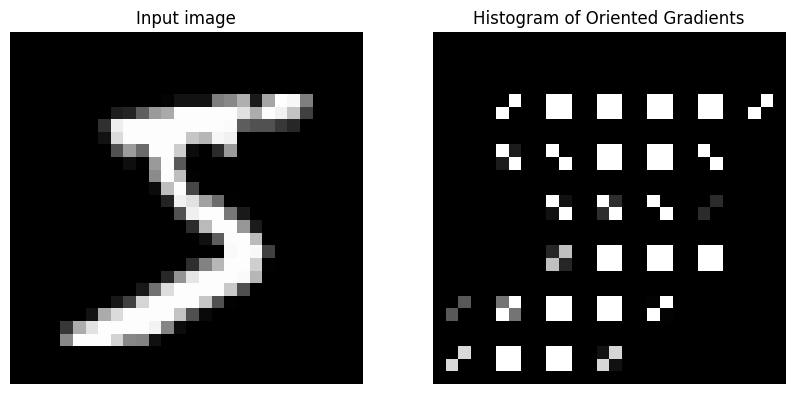

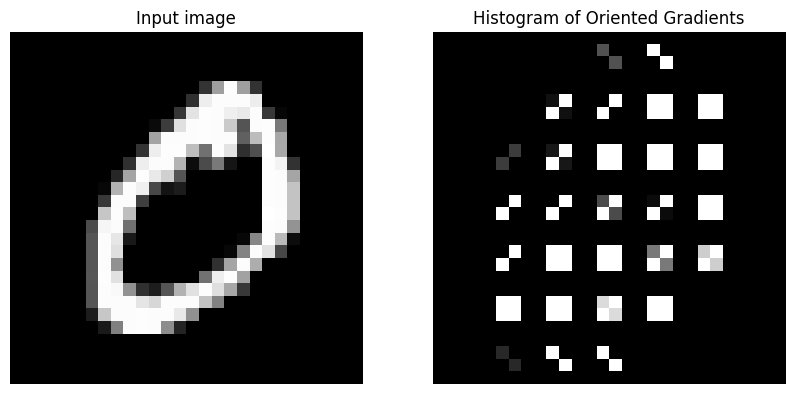

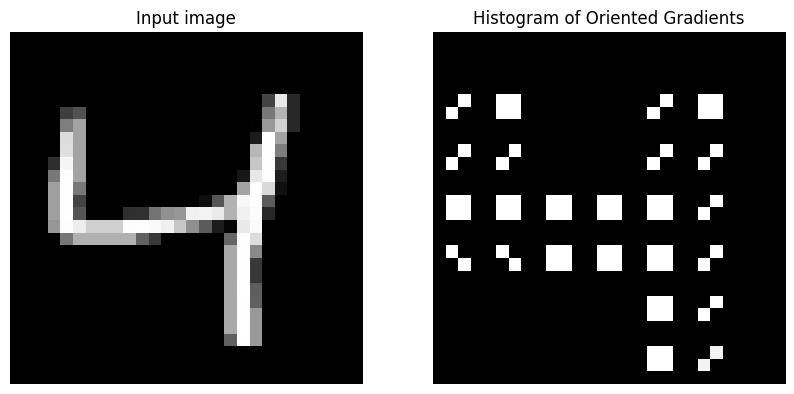

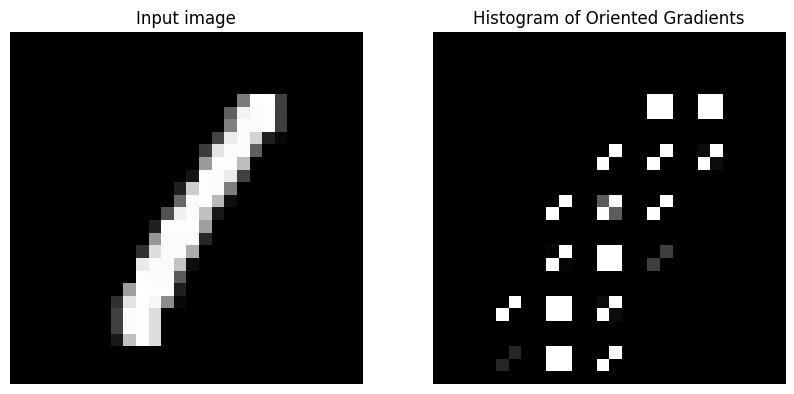

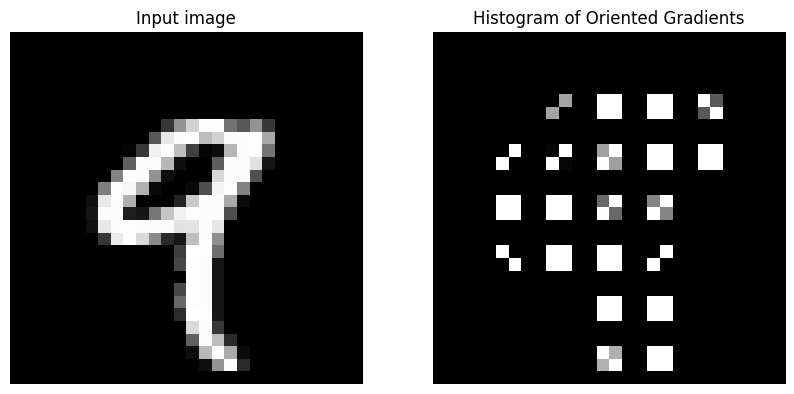

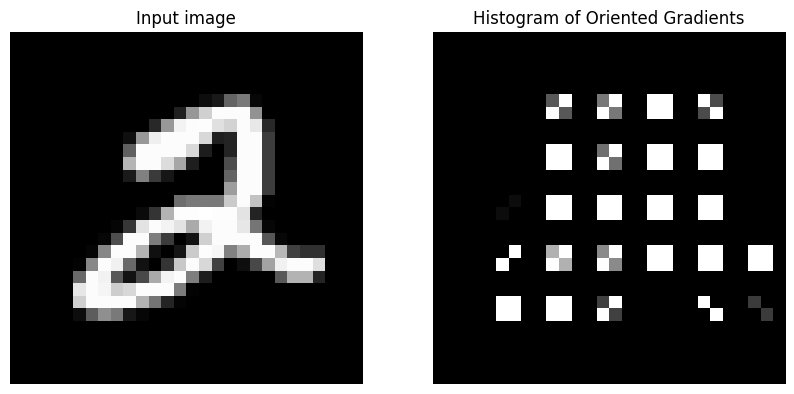

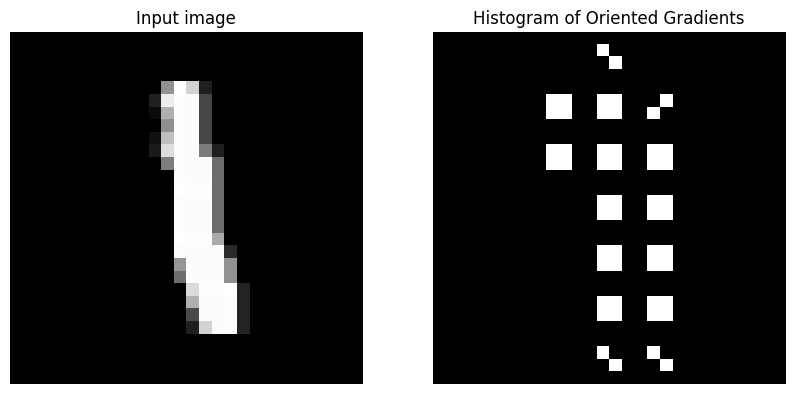

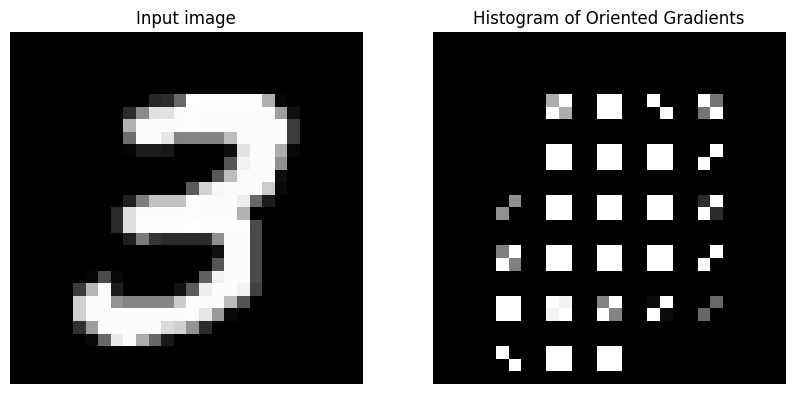

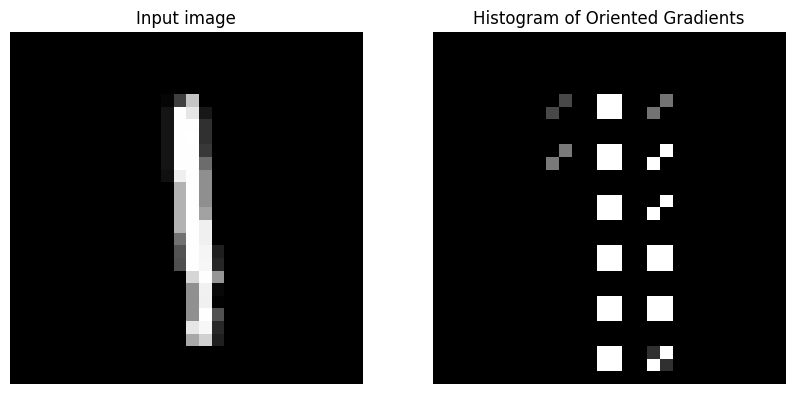

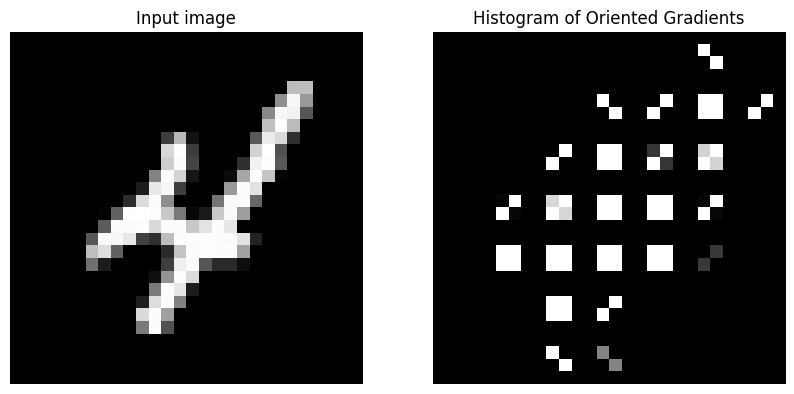

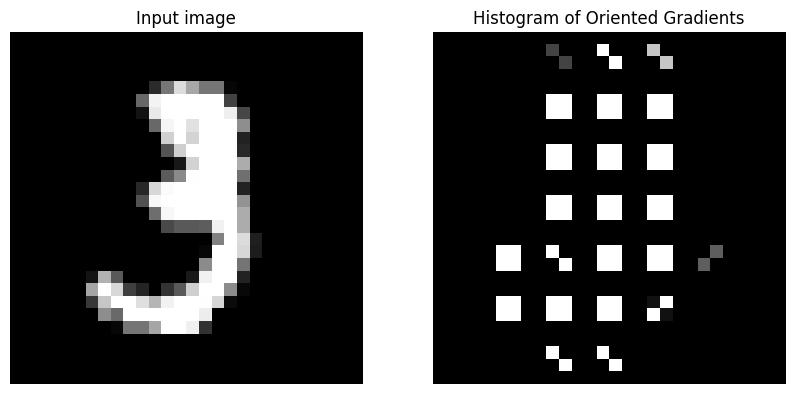

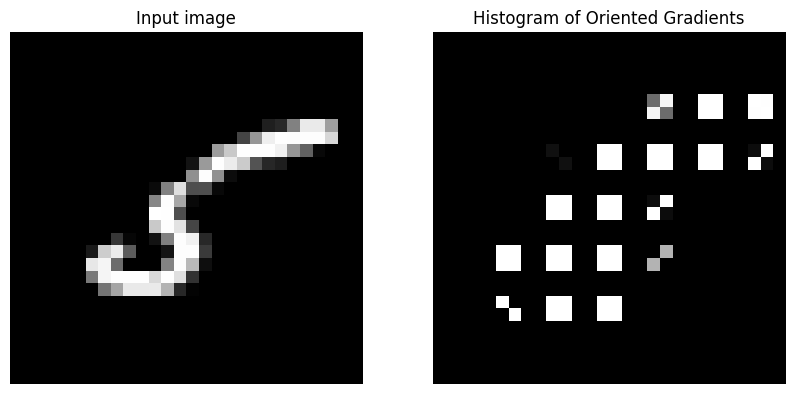

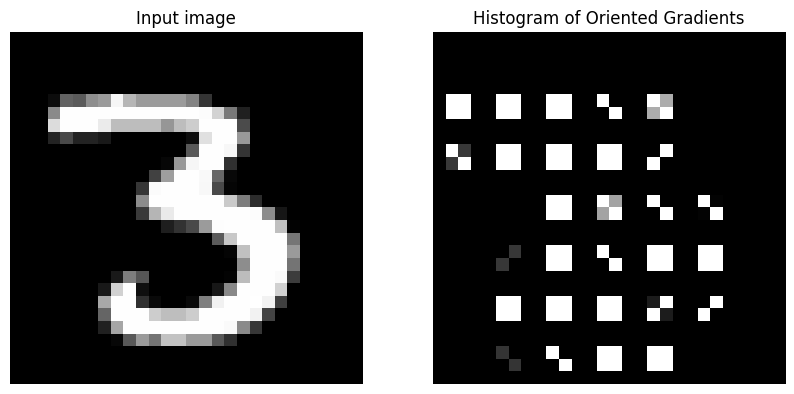

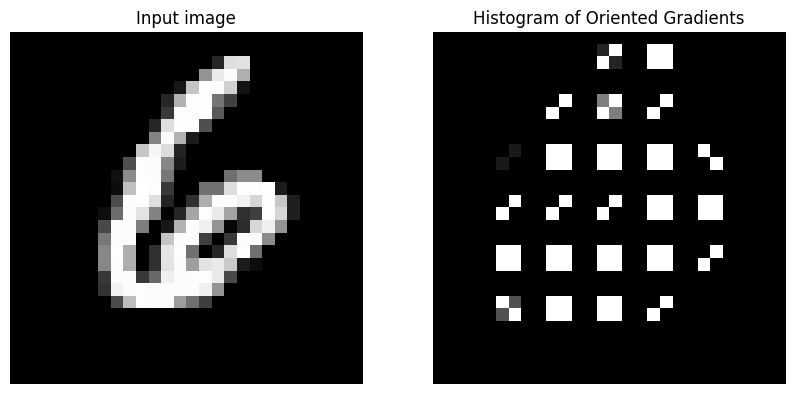

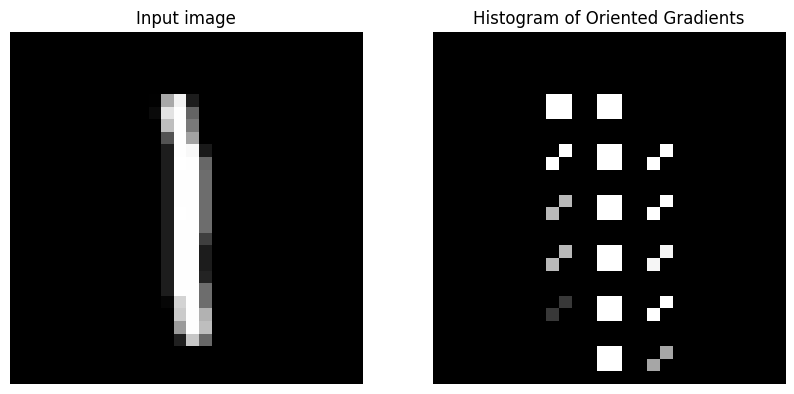

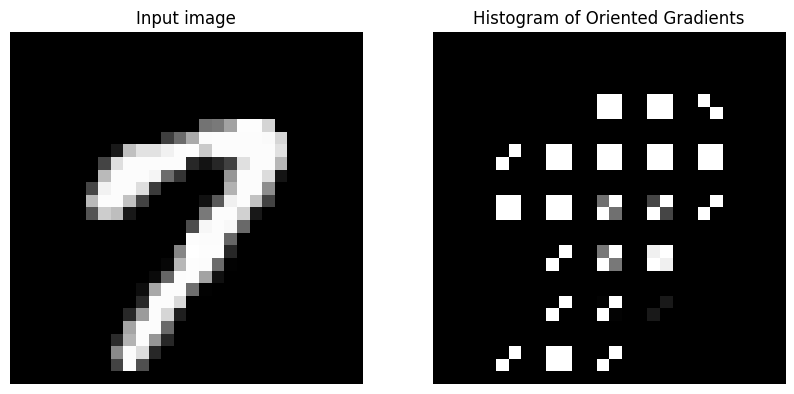

In [40]:
for i in range(16):
  image = train_X[i]
  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10), sharex=True, sharey=True)
  ax1.axis('off')
  ax1.imshow(image, cmap=plt.cm.gray)
  ax1.set_title('Input image')

  # Rescale histogram for better display
  hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

  ax2.axis('off')
  ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
  ax2.set_title('Histogram of Oriented Gradients')
  plt.show()